In [1]:
import pandas as pd
import numpy as np
from numpy import transpose as t
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy.random import randn

In [2]:
class SmoothingSpline:
    
    def relu(self,x):
        if type(x) == int:
            if x>0:
                return x
            else:
                return 0
        else: return np.array([i if i>0 else 0 for i in x])
    
    def N(self,X,k,K):
        d_k = (SmoothingSpline.relu(self,(X-self.knot_list[k-1])**3)-SmoothingSpline.relu(self,(X-self.knot_list[K-1])**3))/(self.knot_list[K-1]-self.knot_list[k-1])
        d_K = (SmoothingSpline.relu(self,(X-self.knot_list[K-2])**3)-SmoothingSpline.relu(self,(X-self.knot_list[K-1])**3))/(self.knot_list[K-1]-self.knot_list[K-2])
        return d_k - d_K
    
    def fit(self,x):
        self.n = x.shape[0]
        self.nknot = x.nunique() #unique한 x값에서 knot가 위치함 
        self.knot_list = x.unique()
        design_M = [np.ones(self.n)]
        design_M.append(np.array(x))
        for k in range(1,self.nknot-1):
            design_M.append(SmoothingSpline.N(self,x,k,self.nknot))
        self.basis = design_M
        self.design_M =  t(design_M)
        print(self.nknot)
    
    def predict(self,x,y):
        self.prediction = self.design_M@inv(t(self.design_M)@self.design_M)@t(self.design_M)@y
        self.coef = inv(t(self.design_M)@self.design_M)@t(self.design_M)@y
        return self.coef
    
    def get_function(self,x):
        f = self.coef[0] + self.coef[1]*x
        for k in range(1,self.nknot-1):
            f += self.coef[k+1]*SmoothingSpline.N(self,x,k,self.nknot)
        return f
    
    def draw_plot(self,x,y):
        x1 = np.linspace(min(x),max(x))
        plt.scatter(x,y)
        plt.plot(x1,SmoothingSpline.get_function(self,x1))
        for i in self.knot_list:
            plt.axvline(i,color='gray', linestyle='--', linewidth='1')

Example

In [3]:
data = pd.read_csv("data/height-weight.csv")
data.head()
x = data['Weight']
y = data['Height']

In [4]:
Nc = SmoothingSpline()

In [5]:
Nc.fit(x)

15


In [6]:
pred = Nc.predict(x,y)

In [7]:
pred

array([-0.48884795,  0.03751863, -0.12229557,  0.2470827 , -0.2087859 ,
        0.14535071, -0.08578538,  0.00756032,  0.0402563 , -0.03335043,
        0.02188995, -0.0230622 ,  0.02242113, -0.02019179,  0.01213522])

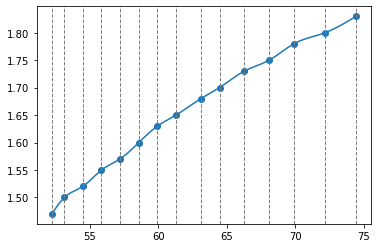

In [8]:
Nc.draw_plot(x,y)

Example 2

In [9]:
df = pd.read_csv('data/toluca_company_dataset.csv')

In [10]:
x=df['Lot_size']
y=df['Work_hours']

In [11]:
Nc = SmoothingSpline()

In [12]:
Nc.fit(x)

11


In [13]:
pred = Nc.predict(x,y)
pred

array([-115.70779018,   11.43538951,   -1.39188044,    5.04986968,
          3.67103386,    1.15932389,    2.64471455,   -4.07877202,
         -0.15320746,   -0.33802096,   -4.28121054])

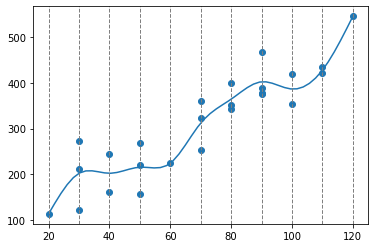

In [14]:
Nc.draw_plot(x,y)